> Importing Python Libraries: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns;sns.set(style="white")
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout,Conv1D,MaxPooling1D,Flatten,LSTM
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
import pickle
from IPython.display import display
import warnings
warnings.simplefilter("ignore")

> Loading Dataset as Pandas Data:

In [2]:
df_diab = pd.read_csv("/Users/rohithchityala/Desktop/diabetes(1).csv")
print("Our orignal data-set have {} rows and {} columns. \n" .format(df_diab.shape[0], df_diab.shape[1]))


Our orignal data-set have 768 rows and 9 columns. 



> First Five Rows:

In [3]:
df_diab.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

> Last Five Rows:


In [4]:
df_diab.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [5]:
print("We have following columns in our dataframe:",df_diab.columns)

We have following columns in our dataframe: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


> Ramdom Ten Rows:

In [6]:
df_diab.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
465            0      124             56             13      105  21.8   
243            6      119             50             22      176  27.1   
407            0      101             62              0        0  21.9   
300            0      167              0              0        0  32.3   
310            6       80             66             30        0  26.2   
457            5       86             68             28       71  30.2   
492            4       99             68             38        0  32.8   
412            1      143             84             23      310  42.4   
16             0      118             84             47      230  45.8   
395            2      127             58             24      275  27.7   

     DiabetesPedigreeFunction  Age  Outcome  
465                     0.452   21        0  
243                     1.318   33        1  
407                     0.336   25        0  
300                     0.839   30        1  
310                     0.313   41        0  
457                     0.364   24        0  
492                     0.145   33        0  
412                     1.076   22        0  
16                      0.551   31        1  
395                     1.600   25        0

> Descriptive Statistics:

In [7]:
df_diab.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

> Check for presence of Null values:

In [8]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
print("No null value present in out data.")

No null value present in out data.


> Datatype Check:

In [10]:
df_diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

> Target variable Distribution:

In [11]:
df_diab.Outcome.value_counts()*100/len(df_diab)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [12]:
df_diab.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

> Data Visualisation:

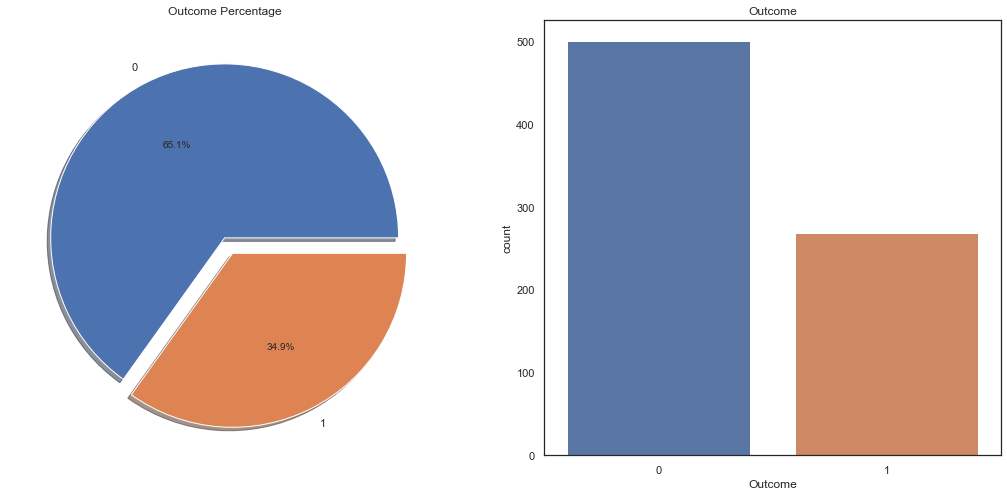

In [13]:
#Countplot of Outcome variable
f,ax=plt.subplots(1,2,figsize=(18,8))
df_diab['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome Percentage')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df_diab,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()



In [14]:
#Univariate analysis

for col in ["Pregnancies", "Age", "DiabetesPedigreeFunction", "Insulin", "BMI", "SkinThickness", "BloodPressure", "Glucose"]:

  fig = px.histogram(df_diab, x=col,marginal="box",template ="simple_white",color_discrete_sequence = px.colors.diverging.Spectral)

  fig.update_layout(title_text="<b> Distribution Of {} </b>".format(col),
                    title_x=0.5, 
                    font_size=10)
  fig.show()




> Removing Outliers:

In [15]:
# shape before removing outliers
print("Before removing outliers we have {} rows and {} columns. \n" .format(df_diab.shape[0], df_diab.shape[1]))


Before removing outliers we have 768 rows and 9 columns. 



In [16]:
#Removing outliers
df_diab.drop(df_diab[df_diab["Pregnancies"] > 14].index,inplace=True)
df_diab.drop(df_diab[df_diab["Glucose"] < 50].index,inplace=True)
df_diab.drop(df_diab[df_diab["BloodPressure"] > 120].index,inplace=True)
df_diab.drop(df_diab[df_diab["SkinThickness"] > 80].index,inplace=True)
df_diab.drop(df_diab[df_diab["BMI"] > 55].index,inplace=True)
df_diab.drop(df_diab[df_diab["Insulin"] > 600].index,inplace=True)
df_diab.drop(df_diab[df_diab["DiabetesPedigreeFunction"] > 2].index,inplace=True)
df_diab.drop(df_diab[df_diab["Age"] > 70].index,inplace=True)

In [17]:
# shape after removing outliers
print("After removing outliers we have {} rows and {} columns. \n" .format(df_diab.shape[0], df_diab.shape[1]))


After removing outliers we have 748 rows and 9 columns. 



> Pairplot on hue basis of Target varaable:

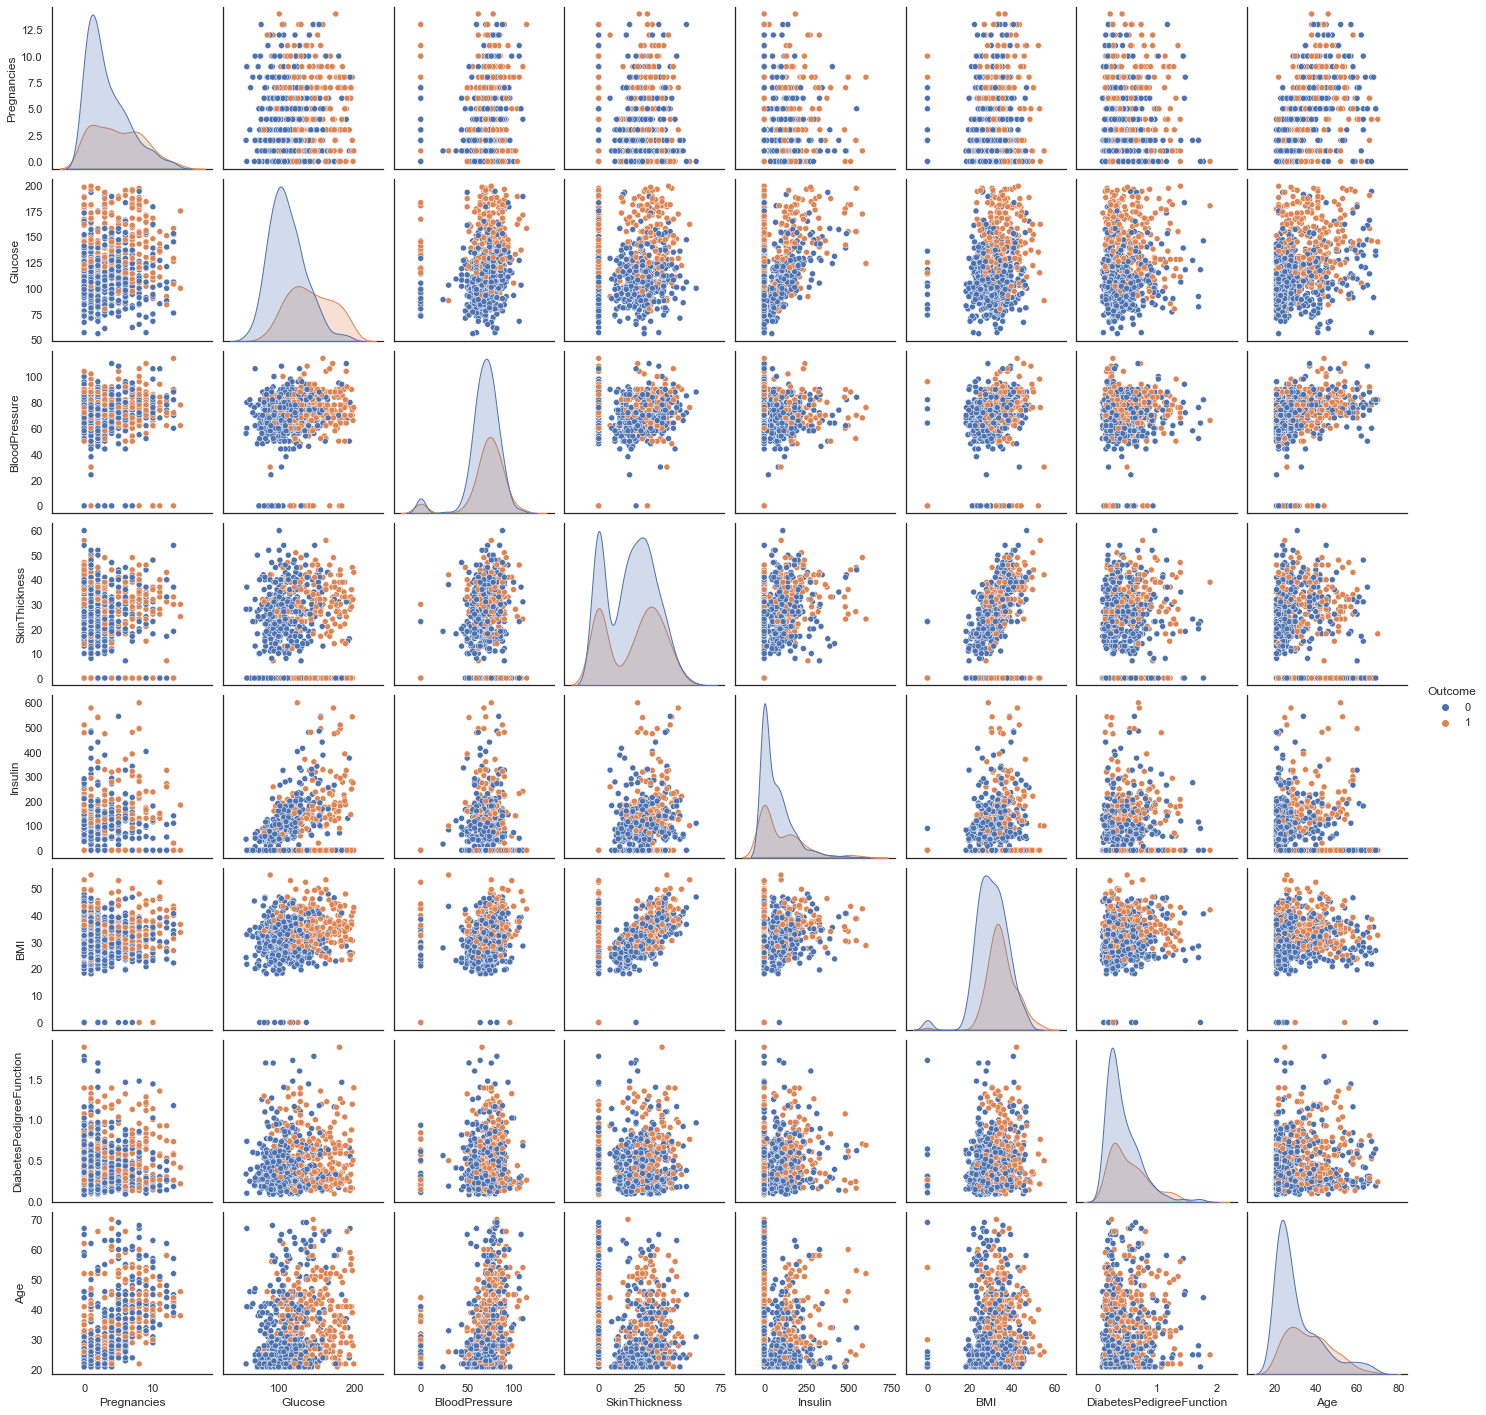

In [18]:
# #pairplot

sns.pairplot(data=df_diab, hue = 'Outcome')
plt.show()

> Correlation:

In [19]:
#correlation

df_diab.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.135581       0.149733      -0.086874   
Glucose                      0.135581  1.000000       0.163171       0.034612   
BloodPressure                0.149733  0.163171       1.000000       0.206800   
SkinThickness               -0.086874  0.034612       0.206800       1.000000   
Insulin                     -0.068608  0.307610       0.087749       0.468987   
BMI                          0.026489  0.222609       0.270587       0.375281   
DiabetesPedigreeFunction    -0.022037  0.099248       0.055446       0.152130   
Age                          0.555874  0.268289       0.275515      -0.133480   
Outcome                      0.222183  0.493506       0.064713       0.049167   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.068608  0.026489                 -0.022037   
Glucose                   0.307610  0.222609                  0.099248   
BloodPressure             0.087749  0.270587                  0.055446   
SkinThickness             0.468987  0.375281                  0.152130   
Insulin                   1.000000  0.186397                  0.143536   
BMI                       0.186397  1.000000                  0.103216   
DiabetesPedigreeFunction  0.143536  0.103216                  1.000000   
Age                      -0.051635  0.059199                  0.041864   
Outcome                   0.135336  0.284090                  0.166706   

                               Age   Outcome  
Pregnancies               0.555874  0.222183  
Glucose                   0.268289  0.493506  
BloodPressure             0.275515  0.064713  
SkinThickness            -0.133480  0.049167  
Insulin                  -0.051635  0.135336  
BMI                       0.059199  0.284090  
DiabetesPedigreeFunction  0.041864  0.166706  
Age                       1.000000  0.241575  
Outcome                   0.241575  1.000000

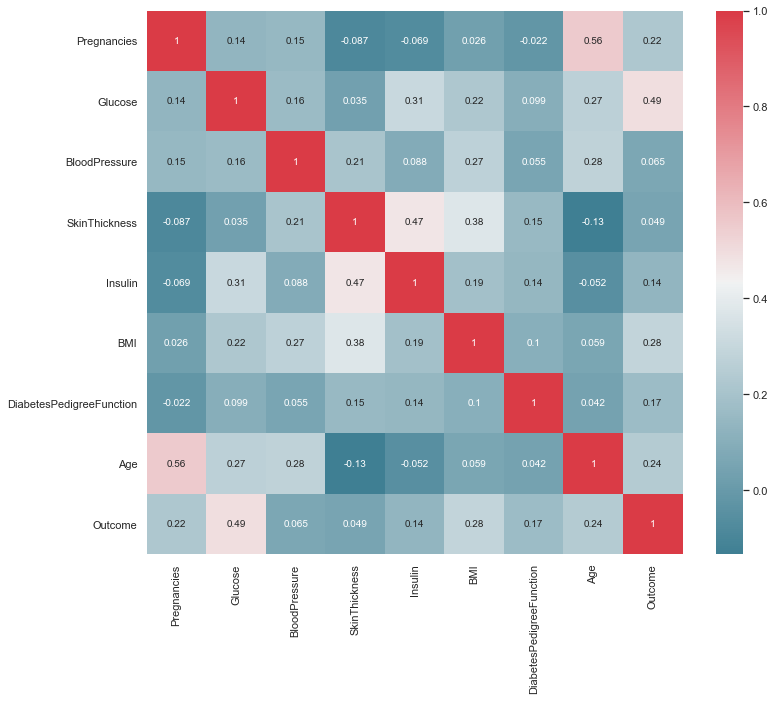

In [20]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df_diab.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))


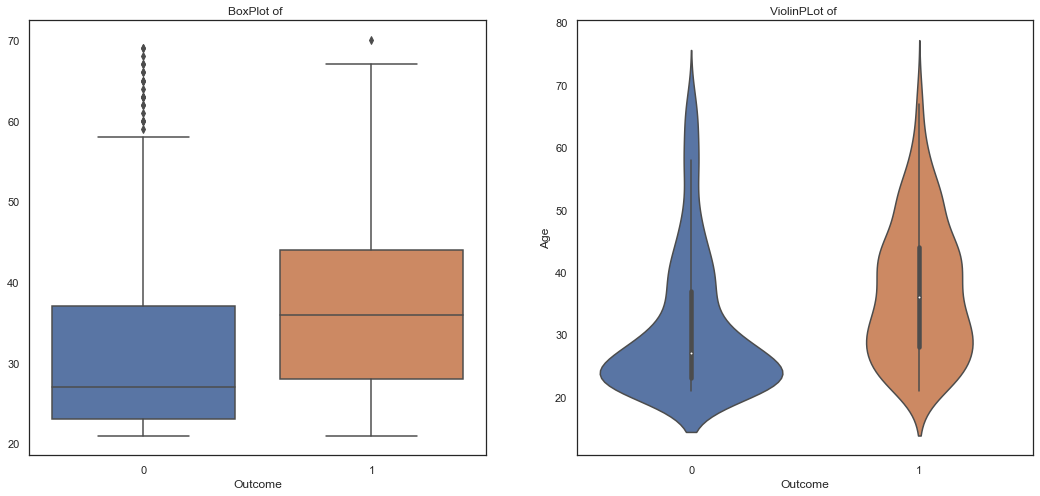

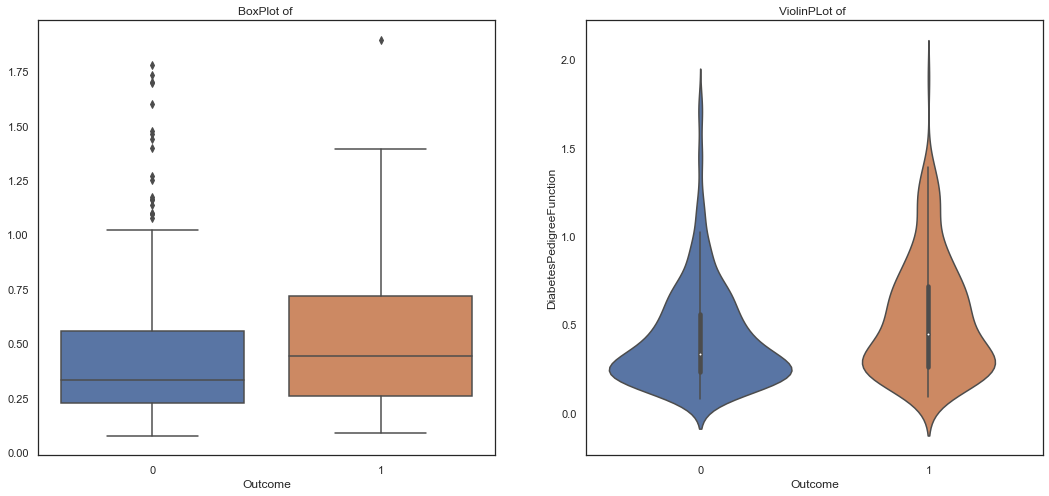

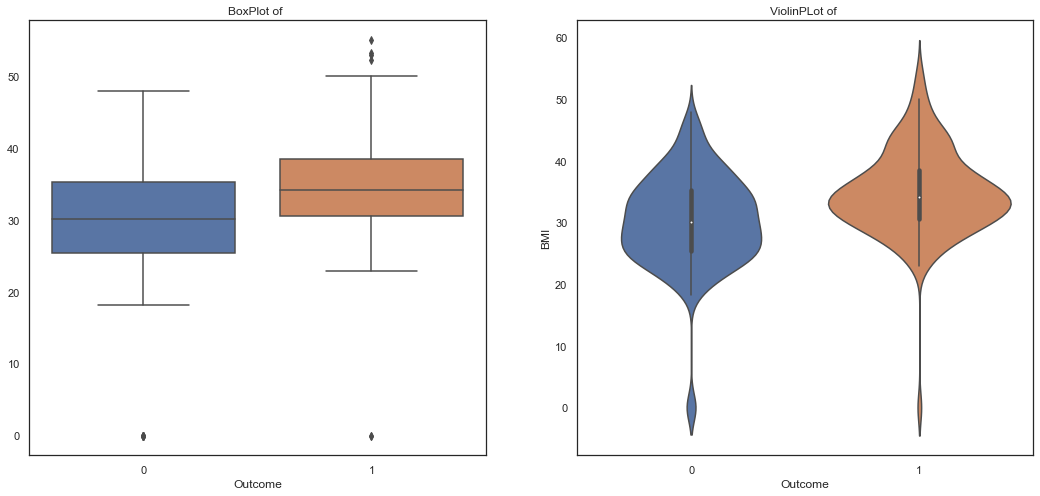

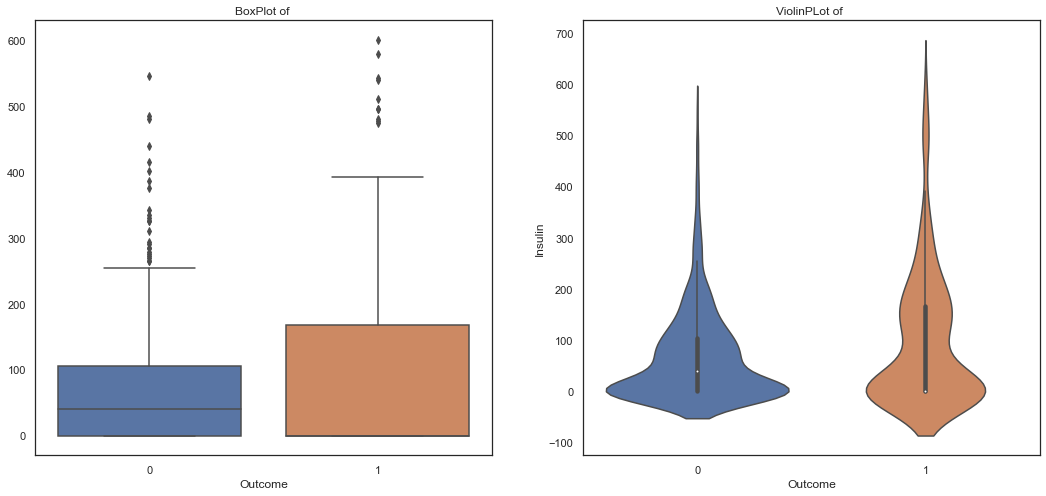

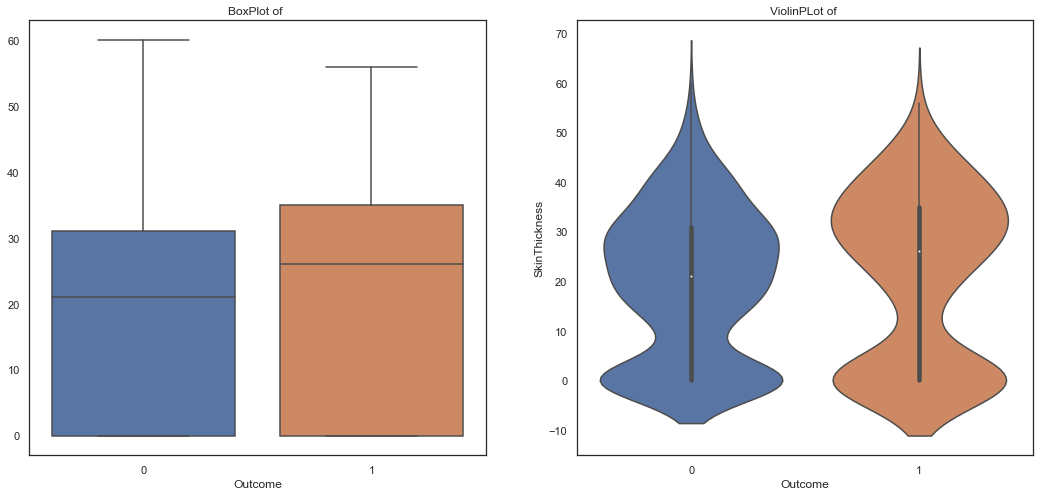

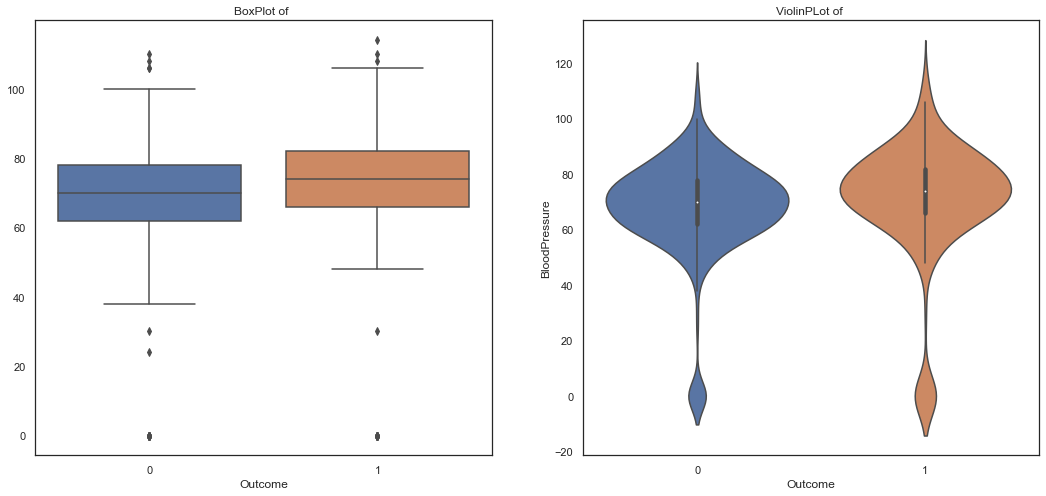

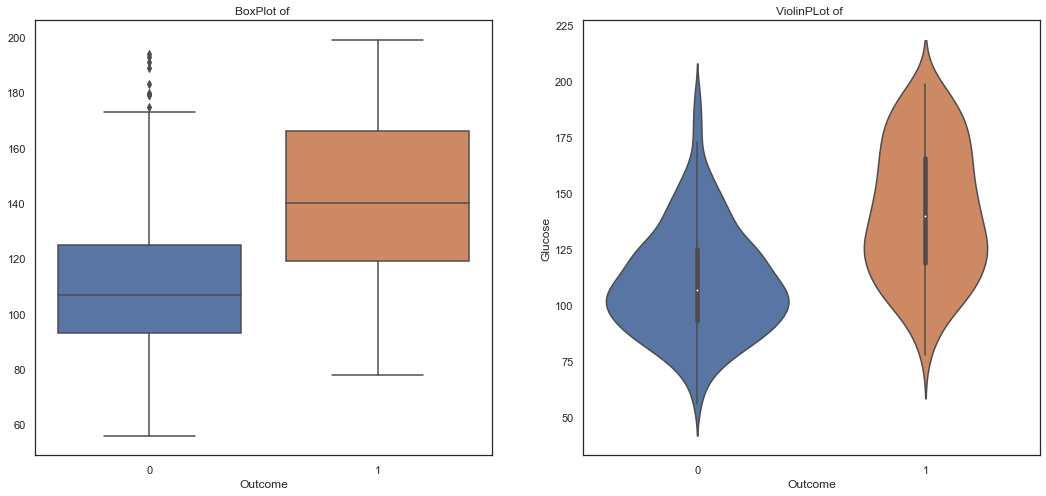

In [21]:
for col in ['Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose']:
  f,ax=plt.subplots(1,2,figsize=(18,8))
  sns.boxplot(x='Outcome', y=col, data=df_diab,ax=ax[0])
  ax[0].set_title("BoxPlot of ".format(col))
  ax[0].set_ylabel('')
  sns.violinplot(x='Outcome', y=col, data=df_diab)
  ax[1].set_title("ViolinPLot of ".format(col))
  plt.show()




> Missing values check: 

In [22]:
#Finding missing values 

df_diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
#Replacing 0 with NaN 

df_diab[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_diab[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [24]:
df_diab.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0           35.0      NaN  33.6   
1            1       85           66.0           29.0      NaN  26.6   
2            8      183           64.0            NaN      NaN  23.3   
3            1       89           66.0           23.0     94.0  28.1   
5            5      116           74.0            NaN      NaN  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0

In [25]:
#count of NaN values
df_diab.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                34
SkinThickness               224
Insulin                     366
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

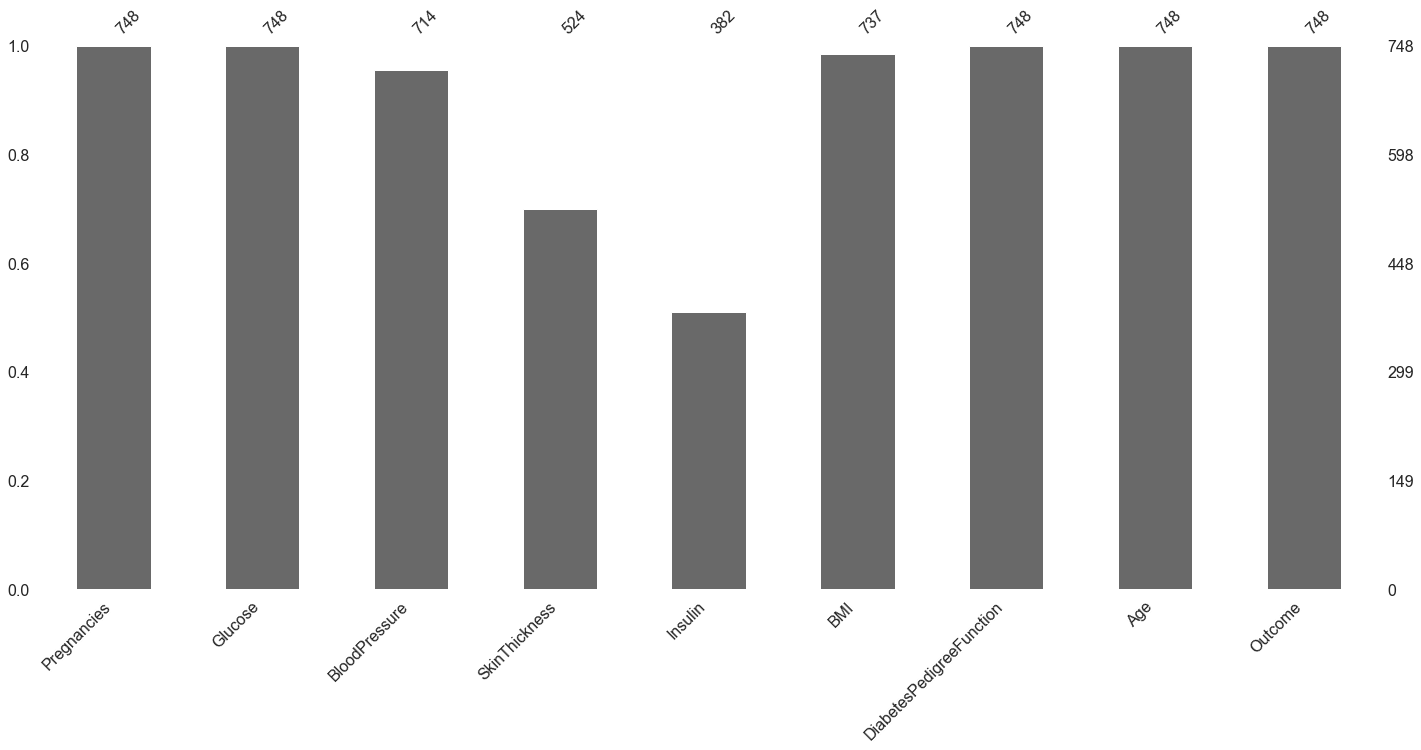

In [26]:
#Visualisation showing the count of non NaN values 
import missingno as msno
msno.bar(df_diab)

> Missing value Imputation:

In [27]:
#filling NaN values with mean & median

df_diab['Glucose'].fillna(df_diab['Glucose'].mean(), inplace=True)

df_diab['BloodPressure'].fillna(df_diab['BloodPressure'].mean(), inplace=True)

df_diab['SkinThickness'].fillna(df_diab['SkinThickness'].median(), inplace=True)

df_diab['Insulin'].fillna(df_diab['Insulin'].median(), inplace=True)

df_diab['BMI'].fillna(df_diab['BMI'].median(), inplace=True)

In [28]:
df_diab.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0           35.0    125.0  33.6   
1            1       85           66.0           29.0    125.0  26.6   
2            8      183           64.0           29.0    125.0  23.3   
3            1       89           66.0           23.0     94.0  28.1   
5            5      116           74.0           29.0    125.0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0

> Final Distribution of Outcome variable:

In [29]:
df_diab.Outcome.value_counts()

0    490
1    258
Name: Outcome, dtype: int64

> Standard Scalar:

In [30]:
from sklearn.preprocessing import StandardScaler


df_diab1 = df_diab
columns_col = list(df_diab1.columns)


columns_col.pop() 

 
X = df_diab1.drop(['Outcome'],axis=1)
y = df_diab1[['Outcome']]


scaler = StandardScaler()
X[columns_col] = scaler.fit_transform(X[columns_col])

X.head()


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.647754  0.890166      -0.026817       0.736738 -0.173086  0.195347   
1    -0.856032 -1.203162      -0.532923       0.015901 -0.173086 -0.867122   
2     1.249268  2.053127      -0.701625       0.015901 -0.173086 -1.368001   
3    -0.856032 -1.070252      -0.532923      -0.704936 -0.576780 -0.639450   
5     0.346997 -0.173111       0.141884       0.015901 -0.173086 -1.018903   

   DiabetesPedigreeFunction       Age  
0                  0.539169  1.463086  
1                 -0.363408 -0.183784  
2                  0.686328 -0.097106  
3                 -0.965126 -1.050558  
5                 -0.853939 -0.270461

> Test Train Split:

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=10)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (523, 8)
Shape of X_test: (225, 8)
Shape of y_train: (523, 1)
Shape of y_test: (225, 1)


> Evaluation Function:

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

def evaluation_score(model,name, flag=False):

  output_ls = []
  global y, X
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=10)


  if name.lower() in ["cnn", "lstm"]:
    X_train = tf.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
    X_test = tf.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
  
  if name.lower() in ["ann", "cnn", "lstm"]:
    y_train=np_utils.to_categorical(y_train,num_classes=2)
    y_test=np_utils.to_categorical(y_test,num_classes=2)

    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]*100
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]*100
    test_prediction= model.predict(X_test)
    test_prediction = np.argmax(test_prediction, axis=1)
    y_testt = np.argmax(y_test, axis=1)

  else:
    y_testt = y_test
    test_prediction = model.predict(X_test)
    train_prediction = model.predict(X_train)
    test_accuracy = accuracy_score(y_test,test_prediction)*100
    train_accuracy = accuracy_score(y_train,train_prediction)*100

  if not flag:
    print("{} Accuracy Score on test dataset = {:.2f}%".format(name, test_accuracy))
    print("{} Accuracy Score on train dataset = {:.2f}%".format(name, train_accuracy))
    print()
    print("{} Confusion Matrix:".format(name))
    
    cm = confusion_matrix(y_testt, test_prediction)
    df_cm = pd.DataFrame(cm,columns=["","True Positive"],index=["True Negative","False Negative"])
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
    plt.title("False Positive",loc='right')
    plt.show()

    print()
    print(name+" Clasification Report:\n",classification_report(y_testt,test_prediction))
    print()

    print(name+"ROC Curve:")
    # calculate scores
    ns_probs = [0 for _ in range(len(y_testt))]

    ns_auc = roc_auc_score(y_testt, ns_probs)
    lr_auc = roc_auc_score(y_testt, test_prediction)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('{}: ROC AUC={:.3f}'.format(name,lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_testt, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_testt, test_prediction)
    # plot the roc curve for the model
    plt.figure(figsize=(15,6))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
  
  else:
    output_ls.append(test_accuracy)
    output_ls.append(train_accuracy)

    return(output_ls)


> Decision Tree Classifier:

Decision Tree Accuracy Score on test dataset = 70.22%
Decision Tree Accuracy Score on train dataset = 100.00%

Decision Tree Confusion Matrix:


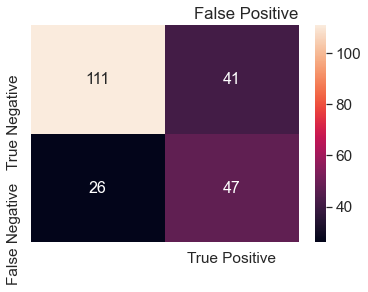


Decision Tree Clasification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       152
           1       0.53      0.64      0.58        73

    accuracy                           0.70       225
   macro avg       0.67      0.69      0.68       225
weighted avg       0.72      0.70      0.71       225


Decision TreeROC Curve:
No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.687


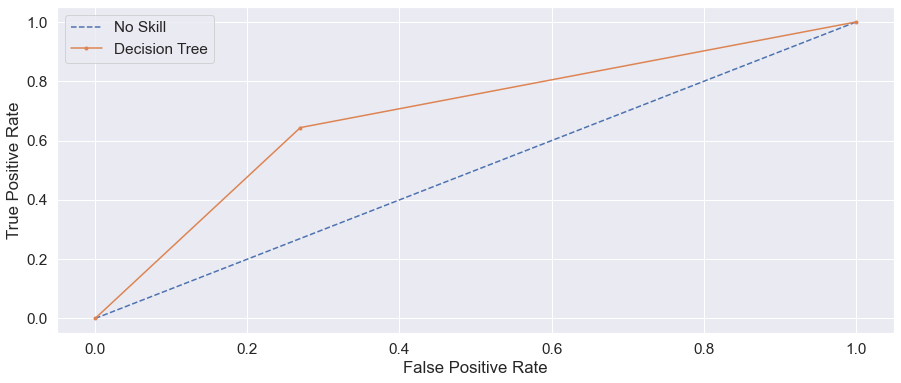

In [33]:
from sklearn.tree import DecisionTreeClassifier 

d_tree = DecisionTreeClassifier().fit(X_train,y_train)

evaluation_score(d_tree, "Decision Tree", flag=False)


Random Forest Accuracy Score on test dataset = 78.22%
Random Forest Accuracy Score on train dataset = 100.00%

Random Forest Confusion Matrix:


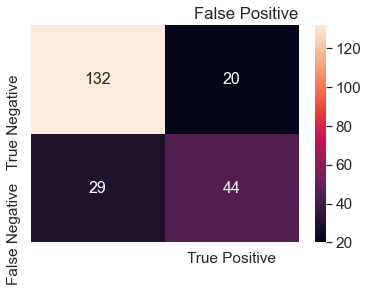


Random Forest Clasification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       152
           1       0.69      0.60      0.64        73

    accuracy                           0.78       225
   macro avg       0.75      0.74      0.74       225
weighted avg       0.78      0.78      0.78       225


Random ForestROC Curve:
No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.736


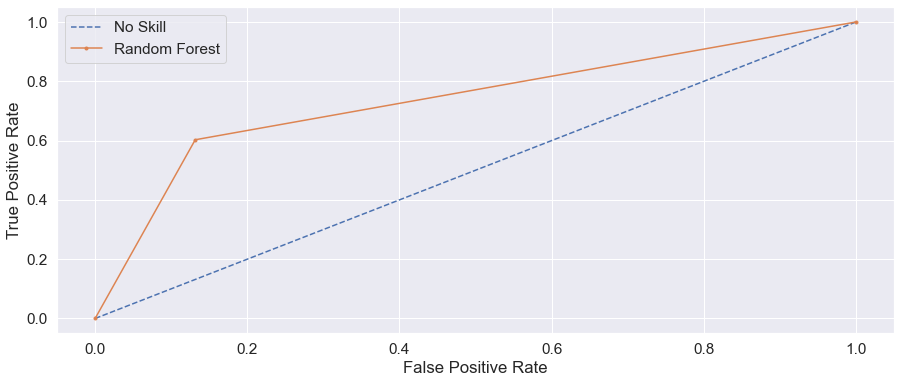

<AxesSubplot:>

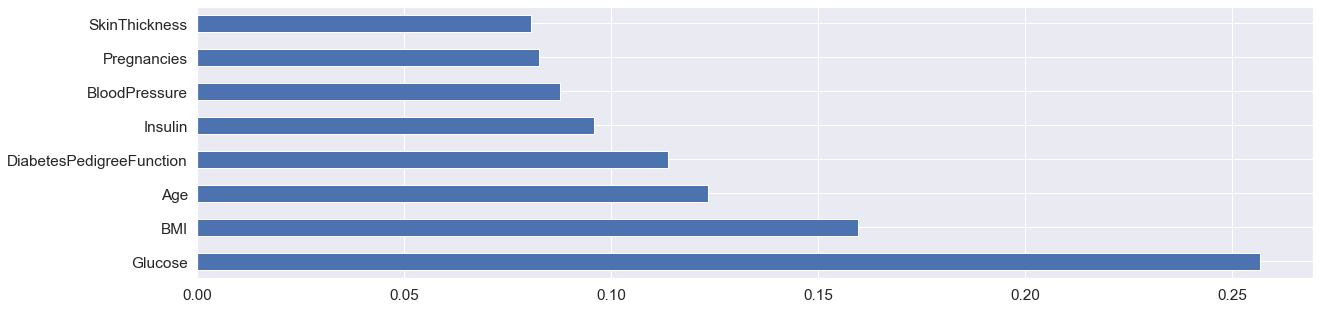

In [34]:
from sklearn.ensemble import RandomForestClassifier

RC = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt') .fit(X_train, y_train)

evaluation_score(RC, "Random Forest", flag=False)

rc_feat_importances = pd.Series(RC.feature_importances_, index=X.columns)
rc_feat_importances.nlargest(10).plot(kind='barh', figsize=(20,5))

> Logistic Regression:

Logistic Regression Accuracy Score on test dataset = 79.56%
Logistic Regression Accuracy Score on train dataset = 76.29%

Logistic Regression Confusion Matrix:


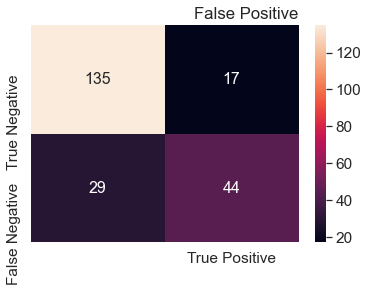


Logistic Regression Clasification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       152
           1       0.72      0.60      0.66        73

    accuracy                           0.80       225
   macro avg       0.77      0.75      0.76       225
weighted avg       0.79      0.80      0.79       225


Logistic RegressionROC Curve:
No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.745


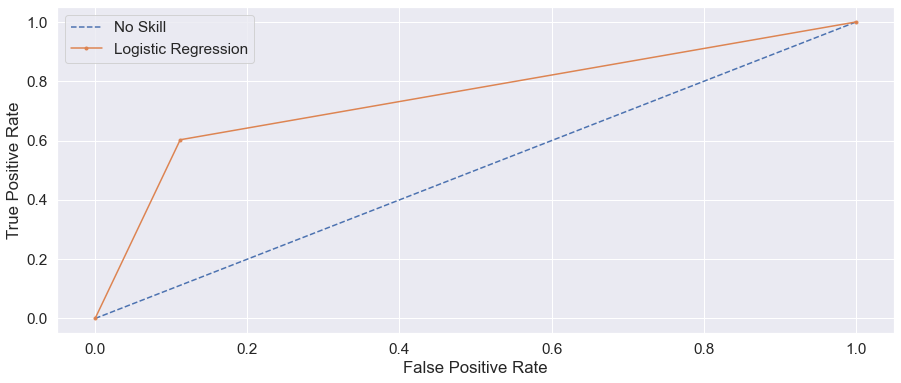

In [35]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression().fit(X_train,y_train)

evaluation_score(LogReg, "Logistic Regression", flag=False)



> Support Vector Machine:

SVC Accuracy Score on test dataset = 78.22%
SVC Accuracy Score on train dataset = 81.64%

SVC Confusion Matrix:


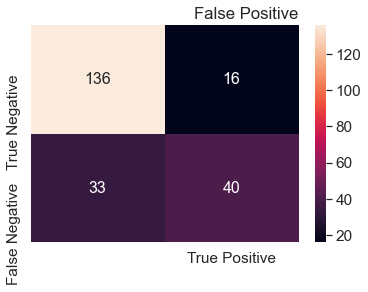


SVC Clasification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       152
           1       0.71      0.55      0.62        73

    accuracy                           0.78       225
   macro avg       0.76      0.72      0.73       225
weighted avg       0.78      0.78      0.77       225


SVCROC Curve:
No Skill: ROC AUC=0.500
SVC: ROC AUC=0.721


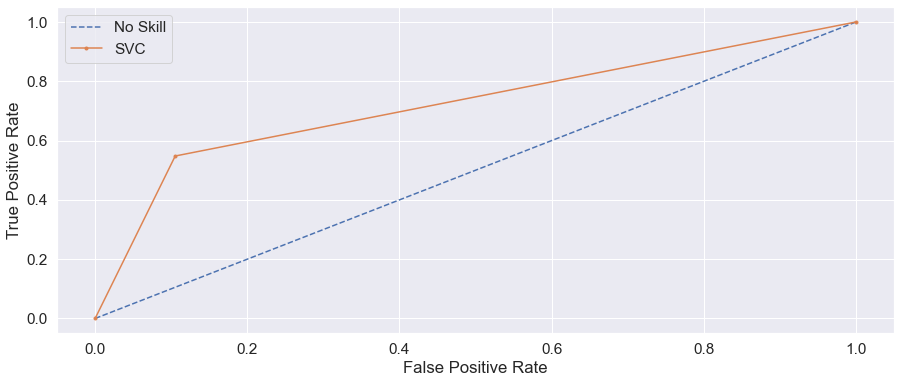

In [36]:
from sklearn.svm import SVC
Svc = SVC().fit(X_train,y_train)

evaluation_score(Svc, "SVC", flag=False)



> KNN:

KNN Accuracy Score on test dataset = 75.11%
KNN Accuracy Score on train dataset = 81.64%

KNN Confusion Matrix:


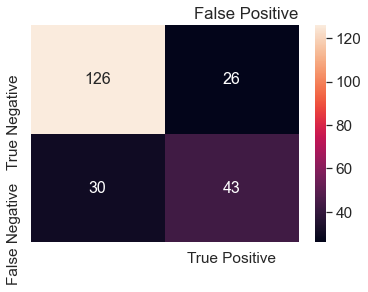


KNN Clasification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       152
           1       0.62      0.59      0.61        73

    accuracy                           0.75       225
   macro avg       0.72      0.71      0.71       225
weighted avg       0.75      0.75      0.75       225


KNNROC Curve:
No Skill: ROC AUC=0.500
KNN: ROC AUC=0.709


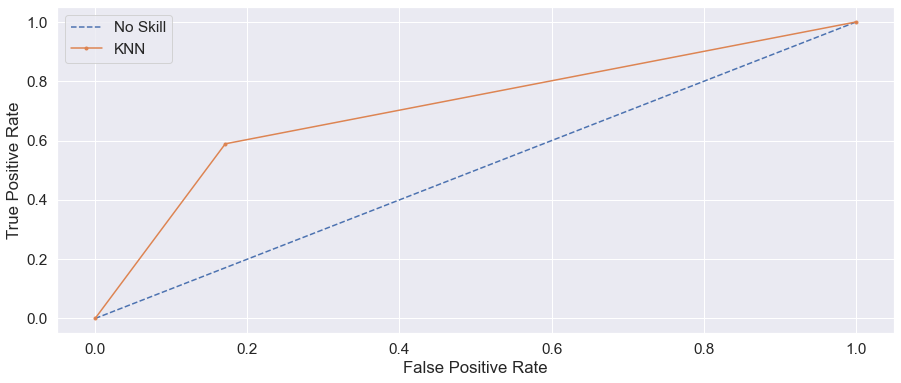

In [37]:
from sklearn.neighbors import KNeighborsClassifier 
model_Knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

evaluation_score(model_Knn, "KNN", flag=False)



> XGBoost:

[22:20:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Accuracy Score on test dataset = 76.00%
XG Boost Accuracy Score on train dataset = 100.00%

XG Boost Confusion Matrix:


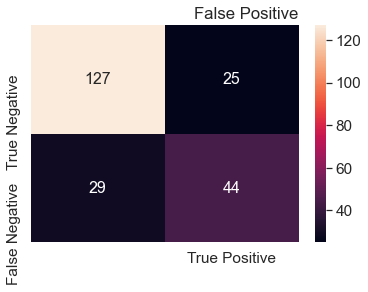


XG Boost Clasification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       152
           1       0.64      0.60      0.62        73

    accuracy                           0.76       225
   macro avg       0.73      0.72      0.72       225
weighted avg       0.76      0.76      0.76       225


XG BoostROC Curve:
No Skill: ROC AUC=0.500
XG Boost: ROC AUC=0.719


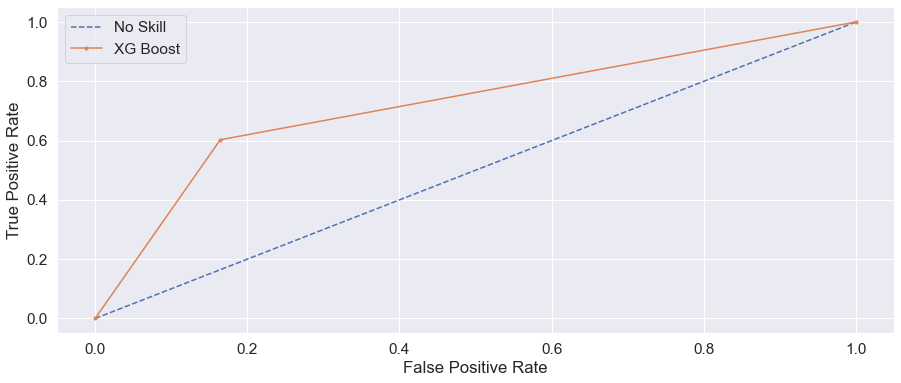

<AxesSubplot:>

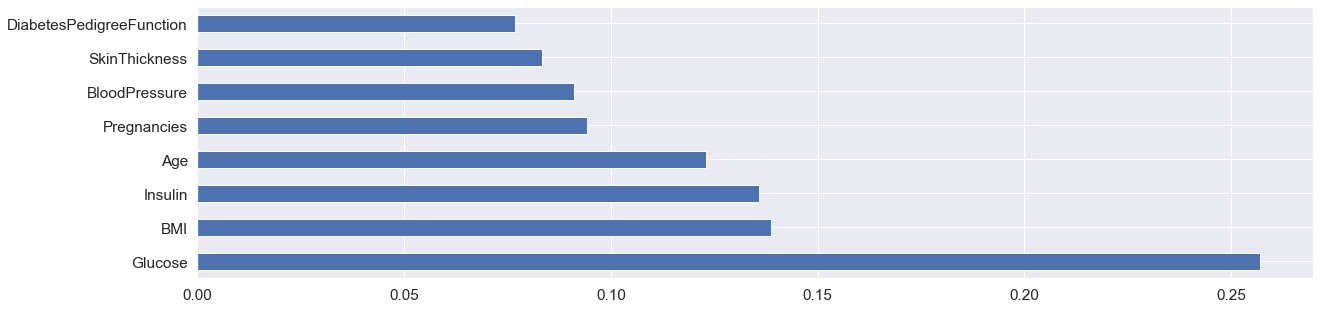

In [38]:
from xgboost import XGBClassifier
Model_XGB = XGBClassifier(gamma=0).fit(X_train, y_train)

evaluation_score(Model_XGB, "XG Boost", flag=False)

xg_feat_importances = pd.Series(Model_XGB.feature_importances_, index=X.columns)
xg_feat_importances.nlargest(10).plot(kind='barh', figsize=(20,5))

> ANN:

In [39]:
#onehotencoding
y_train=np_utils.to_categorical(y_train,num_classes=2)
y_test=np_utils.to_categorical(y_test,num_classes=2)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (523, 2)
Shape of y_test (225, 2)


In [40]:
keras.backend.clear_session()
ann=Sequential()
ann.add(Dense(1000,input_dim=8,activation='relu'))
ann.add(Dense(500,activation='relu'))
ann.add(Dense(300,activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(2,activation='softmax'))
ann.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              9000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 602       
Total params: 660,402
Trainable params: 660,402
Non-trainable params: 0
_________________________________________________________________


In [42]:
early_stopping_monitor = EarlyStopping(patience = 3) 
ann.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=1, callbacks = [early_stopping_monitor])

Epoch 1/100
27/27 [==============================] - 1s 18ms/step - loss: 0.5173 - accuracy: 0.7419 - val_loss: 0.4680 - val_accuracy: 0.7911
Epoch 2/100
27/27 [==============================] - 0s 11ms/step - loss: 0.4641 - accuracy: 0.7801 - val_loss: 0.4646 - val_accuracy: 0.7689
Epoch 3/100
27/27 [==============================] - 0s 14ms/step - loss: 0.4341 - accuracy: 0.7839 - val_loss: 0.4605 - val_accuracy: 0.7511
Epoch 4/100
27/27 [==============================] - 0s 11ms/step - loss: 0.4335 - accuracy: 0.7897 - val_loss: 0.4736 - val_accuracy: 0.7467
Epoch 5/100
27/27 [==============================] - 0s 11ms/step - loss: 0.4113 - accuracy: 0.7859 - val_loss: 0.4782 - val_accuracy: 0.7644
Epoch 6/100
27/27 [==============================] - 0s 12ms/step - loss: 0.4050 - accuracy: 0.7935 - val_loss: 0.4699 - val_accuracy: 0.7467


ANN Accuracy Score on test dataset = 74.67%
ANN Accuracy Score on train dataset = 81.07%

ANN Confusion Matrix:


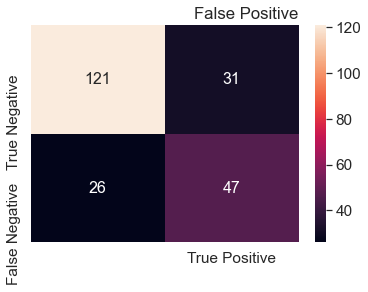


ANN Clasification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       152
           1       0.60      0.64      0.62        73

    accuracy                           0.75       225
   macro avg       0.71      0.72      0.72       225
weighted avg       0.75      0.75      0.75       225


ANNROC Curve:
No Skill: ROC AUC=0.500
ANN: ROC AUC=0.720


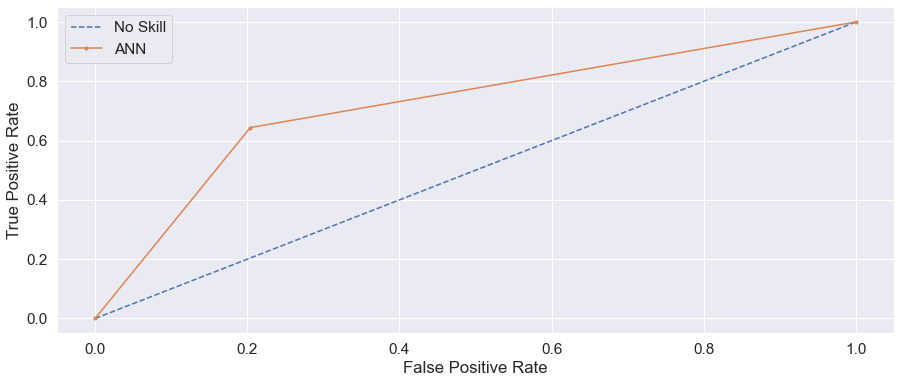

In [43]:
evaluation_score(ann,"ANN", flag=False)

> CNN:

In [44]:

X_train = tf.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_test = tf.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

keras.backend.clear_session()
cnn = Sequential()
cnn.add(Conv1D(filters=100, kernel_size=3, input_shape= (X_train.shape[1], X_train.shape[2])))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=100, kernel_size=3))
cnn.add(Flatten())
cnn.add(Dense(10, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(100, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(2, activation='softmax'))
cnn.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 100)            400       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 100)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 100)            30100     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1

In [45]:
cnn.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=1, callbacks = [early_stopping_monitor])

Epoch 1/100
27/27 [==============================] - 2s 20ms/step - loss: 0.6148 - accuracy: 0.6711 - val_loss: 0.5022 - val_accuracy: 0.7333
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 0.5210 - accuracy: 0.7266 - val_loss: 0.4690 - val_accuracy: 0.7556
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 0.5025 - accuracy: 0.7514 - val_loss: 0.4636 - val_accuracy: 0.7867
Epoch 4/100
27/27 [==============================] - 0s 7ms/step - loss: 0.4729 - accuracy: 0.7304 - val_loss: 0.4609 - val_accuracy: 0.8044
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.4823 - accuracy: 0.7457 - val_loss: 0.4607 - val_accuracy: 0.8044
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.4665 - accuracy: 0.7648 - val_loss: 0.4662 - val_accuracy: 0.8044
Epoch 7/100
27/27 [==============================] - 0s 7ms/step - loss: 0.4742 - accuracy: 0.7591 - val_loss: 0.4576 - val_accuracy: 0.8044
Epoch 8/100


CNN Accuracy Score on test dataset = 81.33%
CNN Accuracy Score on train dataset = 77.25%

CNN Confusion Matrix:


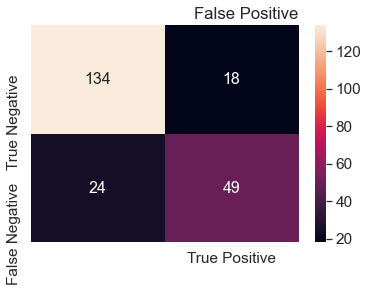


CNN Clasification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       152
           1       0.73      0.67      0.70        73

    accuracy                           0.81       225
   macro avg       0.79      0.78      0.78       225
weighted avg       0.81      0.81      0.81       225


CNNROC Curve:
No Skill: ROC AUC=0.500
CNN: ROC AUC=0.776


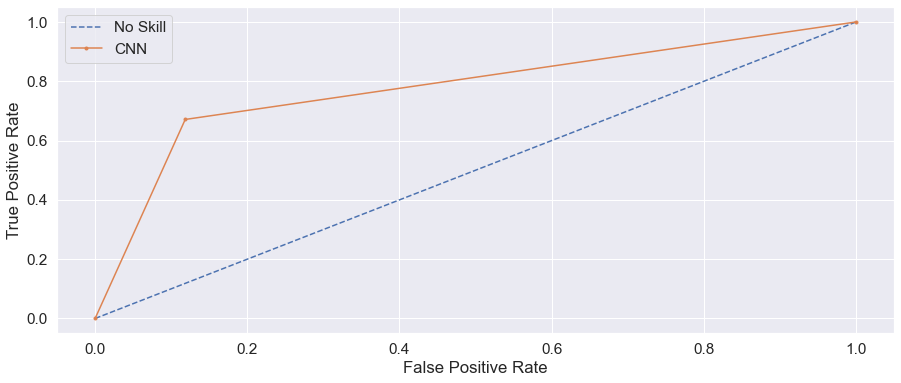

In [46]:
evaluation_score(cnn,"CNN", flag=False)

> LSTM:

In [47]:
keras.backend.clear_session()
lstm = Sequential()
lstm.add(LSTM(units=32, activation='relu', input_shape=(8, 1)) ) 
lstm.add(Flatten())
lstm.add(Dense(10, activation='relu'))
lstm.add(Dropout(0.2))
lstm.add(Dense(100, activation='relu'))
lstm.add(Dropout(0.2))
lstm.add(Dense(10, activation='relu'))
lstm.add(Dropout(0.2))
lstm.add(Dense(2, activation='softmax'))

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])


lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                330       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [48]:
lstm.fit(X_train, y_train, epochs=100, batch_size=32 ,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/100
14/14 [==============================] - 3s 34ms/step - loss: 0.6908 - accuracy: 0.6148 - val_loss: 0.6861 - val_accuracy: 0.6667
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6835 - accuracy: 0.6411 - val_loss: 0.6748 - val_accuracy: 0.6667
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6701 - accuracy: 0.6411 - val_loss: 0.6459 - val_accuracy: 0.6667
Epoch 4/100
14/14 [==============================] - 0s 12ms/step - loss: 0.6475 - accuracy: 0.6411 - val_loss: 0.5944 - val_accuracy: 0.6667
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 0.6117 - accuracy: 0.6411 - val_loss: 0.5310 - val_accuracy: 0.6667
Epoch 6/100
14/14 [==============================] - 0s 13ms/step - loss: 0.5937 - accuracy: 0.6411 - val_loss: 0.5217 - val_accuracy: 0.6667
Epoch 7/100
14/14 [==============================] - 0s 12ms/step - loss: 0.5988 - accuracy: 0.6411 - val_loss: 0.5289 - val_accuracy: 0.6667
Epoch 

LSTM Accuracy Score on test dataset = 76.89%
LSTM Accuracy Score on train dataset = 74.57%

LSTM Confusion Matrix:


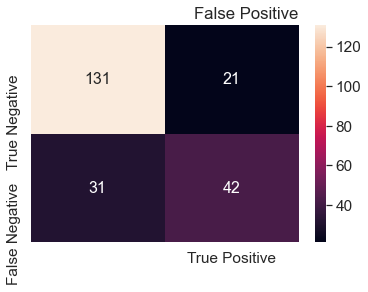


LSTM Clasification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       152
           1       0.67      0.58      0.62        73

    accuracy                           0.77       225
   macro avg       0.74      0.72      0.73       225
weighted avg       0.76      0.77      0.76       225


LSTMROC Curve:
No Skill: ROC AUC=0.500
LSTM: ROC AUC=0.719


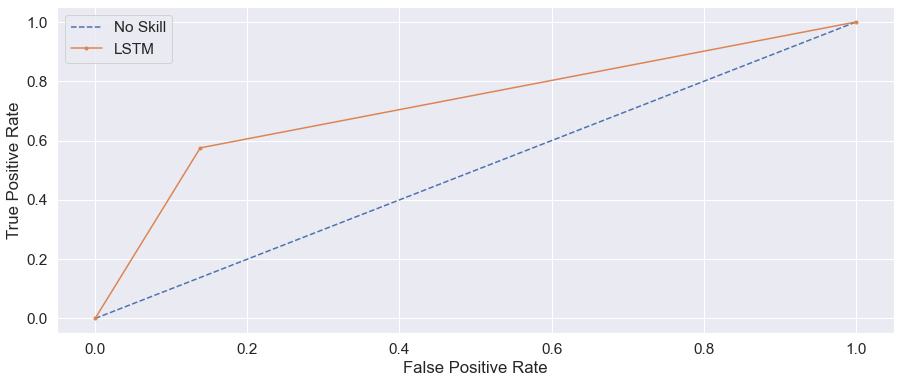

In [49]:
evaluation_score(lstm,"LSTM", flag=False)

> Model Comparision:

In [50]:
model_ls = [d_tree, RC, LogReg, Svc, model_Knn, Model_XGB, ann, cnn, lstm]
name_ls = ["Decsion Tree", "Random Forest", "SVC",  "Logistic Regression", "KNN", 
           "Gradient Boost", "ANN", "CNN", "LSTM"]
test_ls =[]
train_ls =[]

for model,name in zip(model_ls, name_ls):
  
  test_ls.append(evaluation_score(model, name, flag=True)[0])
  train_ls.append(evaluation_score(model, name, flag=True)[1])
  

output_dataframe = pd.DataFrame({"Model Name":name_ls,
                                 "Test Accuracy":test_ls,
                                 "Train Accuracy":train_ls,
                                 "Model": model_ls})
output_dataframe["Lag Score"] = abs(output_dataframe["Train Accuracy"] - output_dataframe["Test Accuracy"])
output_dataframe

Model Name  Test Accuracy  Train Accuracy  \
0         Decsion Tree      70.222222      100.000000   
1        Random Forest      78.222222      100.000000   
2                  SVC      79.555556       76.290631   
3  Logistic Regression      78.222222       81.644359   
4                  KNN      75.111111       81.644359   
5       Gradient Boost      76.000000      100.000000   
6                  ANN      74.666667       81.070745   
7                  CNN      81.333333       77.246654   
8                 LSTM      76.888889       74.569792   

                                               Model  Lag Score  
0  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  29.777778  
1  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  21.777778  
2  LogisticRegression(C=1.0, class_weight=None, d...   3.264925  
3  SVC(C=1.0, break_ties=False, cache_size=200, c...   3.422137  
4  KNeighborsClassifier(algorithm='auto', leaf_si...   6.533248  
5  XGBClassifier(base_score=0.5, booster='gbtree'...  24.000000  
6  <keras.engine.sequential.Sequential object at ...   6.404078  
7  <keras.engine.sequential.Sequential object at ...   4.086679  
8  <keras.engine.sequential.Sequential object at ...   2.319098

In [51]:
print("Best Performing Algorithm based on Test Accuracy:",output_dataframe.loc[output_dataframe["Test Accuracy"].idxmax(), "Model Name"])
print()
print("Best Performing Algorithm based on Train Accuracy:",output_dataframe.loc[output_dataframe["Train Accuracy"].idxmax(), "Model Name"])
print()
print("Best Performing Algorithm based on Lag Score:",output_dataframe.loc[output_dataframe["Lag Score"].idxmin(), "Model Name"])


Best Performing Algorithm based on Test Accuracy: CNN

Best Performing Algorithm based on Train Accuracy: Decsion Tree

Best Performing Algorithm based on Lag Score: LSTM


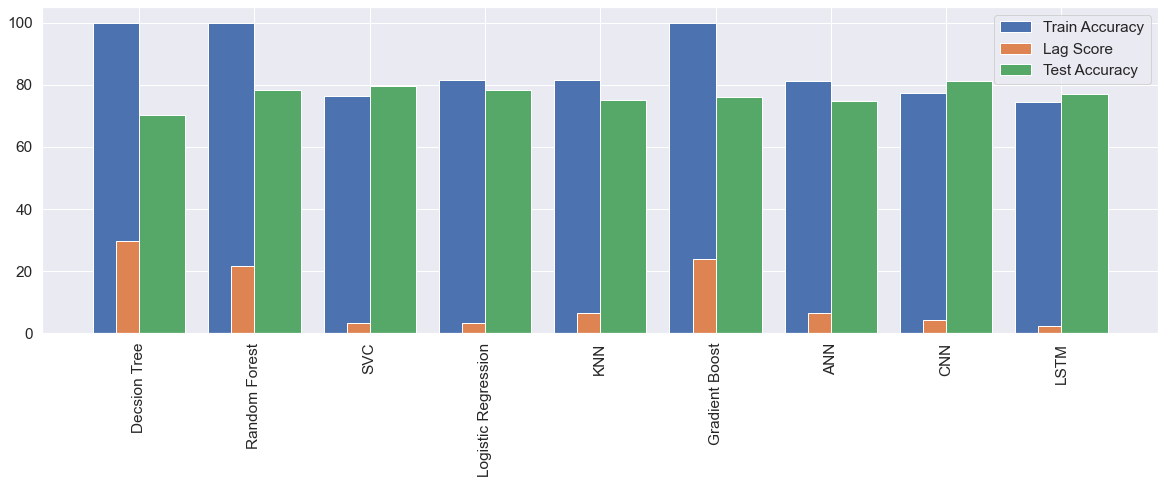

In [52]:
x_axis = np.arange(len(output_dataframe["Model Name"]))
plt.figure(figsize=(20,6))
plt.bar(x_axis -0.2, output_dataframe["Train Accuracy"], width=0.4, label = 'Train Accuracy')
plt.bar(x_axis, output_dataframe["Lag Score"], width=0.4, label = 'Lag Score')
plt.bar(x_axis +0.2, output_dataframe["Test Accuracy"], width=0.4, label = 'Test Accuracy')
plt.xticks(x_axis, output_dataframe["Model Name"])
plt.xticks(rotation=90)
plt.legend()
plt.show()

> Save the best model and make prediction:

In [55]:
best_model = output_dataframe.loc[output_dataframe["Test Accuracy"].idxmax(), "Model"]

pickle.dump(best_model, open("best_model.pkl", 'wb'))
 
# load the best model from disk
loaded_model = pickle.load(open("best_model.pkl", 'rb'))

sample = df_diab1.sample()
sample_X= sample.drop(['Outcome'],axis=1)

print("Prediction Sample:\n")
display(sample_X)
print()
print("Actual Outcome:",sample['Outcome'].values[0])
print()
print("Predicted Outcome:",loaded_model.predict(sample_X).tolist()[0])


TypeError: can't pickle weakref objects